In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
# train_dataset = torchvision.datasets.MNIST(
#                                         root='./data',
#                                         train=True,
#                                         transform=transforms.Compose([
#                                             transforms.Resize(16),
#                                             transforms.ToTensor()
#                                         ]),
#                                         download=False)

# test_dataset = torchvision.datasets.MNIST(
#                                         root='./data',
#                                         train=False,
#                                         transform=transforms.Compose([
#                                             transforms.Resize(16),
#                                             transforms.ToTensor()
#                                         ]))

In [3]:
# train_idx0 = train_dataset.targets==0
# train_idx1 = train_dataset.targets==1
# train_idx = train_idx0 + train_idx1

In [4]:
# test_idx0 = test_dataset.targets==0
# test_idx1 = test_dataset.targets==1
# test_idx = test_idx0 + test_idx1

In [5]:
# train_dataset.data = train_dataset.data[train_idx]
# train_dataset.targets = train_dataset.targets[train_idx]

# test_dataset.data = test_dataset.data[test_idx]
# test_dataset.targets = test_dataset.targets[test_idx]

In [6]:
# train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
#                                            batch_size=32, 
#                                            shuffle=True)

# test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
#                                           batch_size=32, 
#                                           shuffle=False)

In [7]:
data0 = np.array(pd.read_csv('data0.csv', header=None))
data0_label = np.array([0]*data0.shape[0])
data1 = np.array(pd.read_csv('data1.csv', header=None))
data1_label = np.array([1]*data0.shape[0])

In [8]:
data = np.concatenate([data0, data1], axis=0)
data_label = np.concatenate([data0_label, data1_label], axis=0)

In [9]:
# data0 = np.loadtxt('data0.dat')
# data1 = np.loadtxt('data1.dat')

dataset = torch.utils.data.TensorDataset(torch.from_numpy(data).float(), torch.from_numpy(data_label).float())
train_size = int(len(dataset)*0.8)
test_size = len(dataset) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])
print(len(train_dataset), len(test_dataset))

256 64


In [10]:
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=1, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=1, 
                                          shuffle=False)

In [53]:
torch.manual_seed(5)
w = torch.randn(16*16)
lr = 0.1
cnt = 0
err_sum = 1.
err_list = []
while err_sum > 0.1:
    err_sum = 0
    for X, y in train_loader:
        X = X[0]
        y_pred = torch.dot(X, w)
        y_pred = torch.heaviside(y_pred, torch.FloatTensor([0]))

        if y != y_pred:
            w = w + lr*(y - y_pred)*X
            err = lr*(y - y_pred)*X

            err_sum += np.abs(err.detach().numpy().sum())
    err_list.append(err_sum)
    cnt+=1
    print(f'=== {cnt}th loop, sum of errors: {err_sum}')

=== 1th loop, sum of errors: 207.2000126838684
=== 2th loop, sum of errors: 40.200003147125244
=== 3th loop, sum of errors: 11.400001525878906
=== 4th loop, sum of errors: 7.40000057220459
=== 5th loop, sum of errors: 0


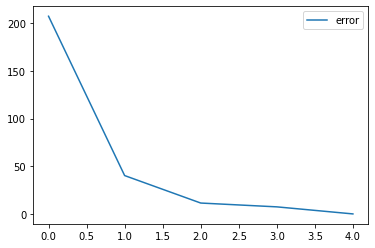

In [51]:
plt.plot(err_list, label='error')
plt.legend()
plt.show()

In [52]:
err = 0
for X, y in test_loader:
    X = X[0]
    y_pred = torch.dot(X, w)
    y_pred = torch.heaviside(y_pred, torch.FloatTensor([0]))

    if y != y_pred:
        err += 1
print('Error Ratio: {}%'.format((err/len(test_dataset))*100))

Error Ratio: 1.5625%
